In [1]:
import os
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Get all the data files
root_dir = os.path.join('..', '..', '..', 'data', 'pdg13-n25-0.5to10GeV-0.5eta')
hit_files = sorted([file for file in os.listdir(root_dir) if file.endswith("-hits.csv")])
final_files = sorted([file for file in os.listdir(root_dir) if file.endswith("-particles_final.csv")])
dfs = [pd.read_csv(os.path.join(root_dir, file)) for file in hit_files]
final_dfs = [pd.read_csv(os.path.join(root_dir, file)) for file in final_files]
dfs[0]

,particle_id,geometry_id,tx,ty,tz,tt,tpx,tpy,tpz,te,deltapx,deltapy,deltapz,deltae,index
0,4503599728033792,936748859932016651,32.272884,-0.712434,-0.315054,0.107714,4.315339,-0.085583,-0.042125,4.317686,0,0,0,0,0
1,4503599946137600,936748859932016651,32.187237,-0.001743,-2.157965,0.108509,0.813235,0.009605,-0.054525,0.821937,0,0,0,0,0
2,4503599862251520,936748859932016652,31.425819,6.312224,13.246838,0.115860,1.766618,0.364646,0.745482,1.954690,0,0,0,0,0
3,4503599962914816,936748859932016652,32.797543,-5.063643,9.198400,0.114882,7.182126,-1.098788,2.013875,7.540367,0,0,0,0,1
4,4503599644147712,936748859932016666,30.526699,10.914364,5.238789,0.109587,3.401895,1.226618,0.584373,3.664715,0,0,0,0,0
5,4503599862251520,936748859932016666,32.940971,6.625372,13.886239,0.121452,1.766431,0.365555,0.745482,1.954690,0,0,0,0,1
6,4503599912583168,936748859932016679,-20.531666,-24.508099,-1.511850,0.106804,-2.511400,-3.012717,-0.185468,3.927997,0,0,0,0,0
7,4503599744811008,936748859932016694,-7.851760,-30.985767,3.505122,0.107279,-1.502871,-5.969863,0.675048,6.193927,0,0,0,0,0
8,4503599979692032,936748859932016707,6.581261,-31.393381,-11.756757,0.114065,0.470587,-2.197890,-0.823849,2.396260,0,0,0,0,0
9,4503600030023680,936748859932016707,5.025425,-31.580996,-14.615366,0.117314,0.645030,-3.992521,-1.848399,4.447924,0,0,0,0,0


### Let's see for one file how many hits there are for every particle

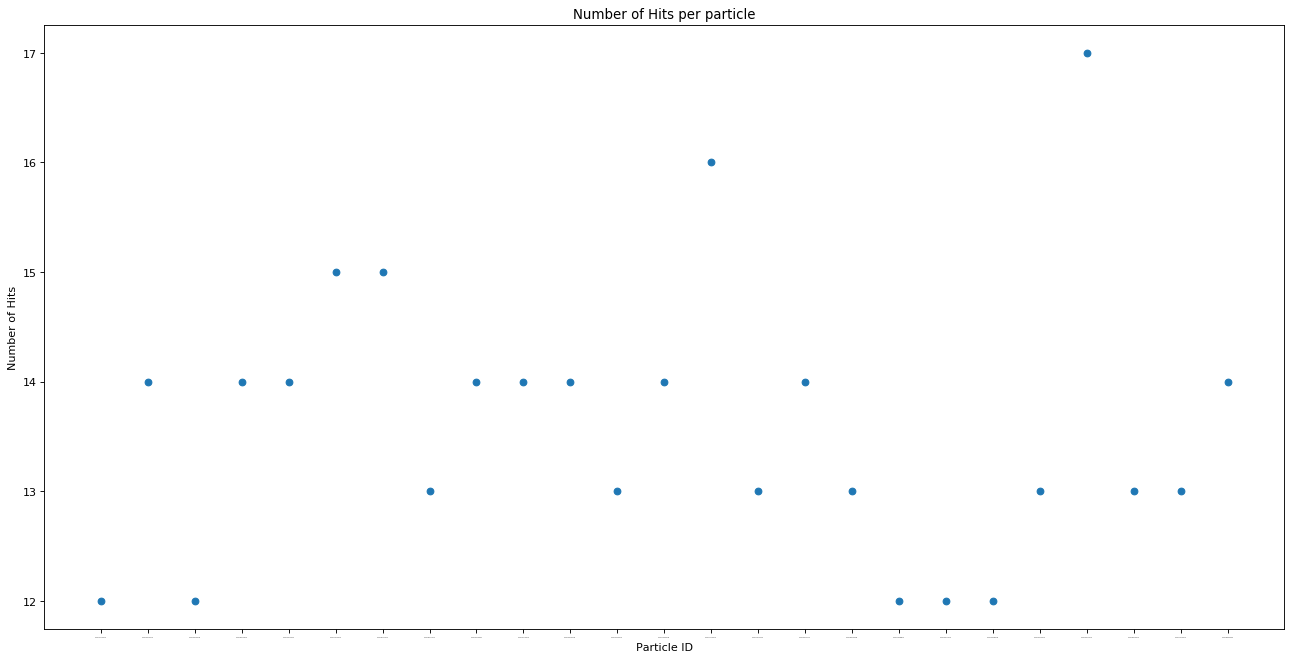

In [3]:
df1 = dfs[10]
final_df1 = final_dfs[10]
unique_particle_ids = list(set(df1['particle_id']))
number_of_hits = [df1[df1['particle_id'] == pid].shape[0] for pid in unique_particle_ids]

plt.figure(figsize=(20, 10), dpi=80)
pids_as_str = list(map(lambda pid: str(pid), unique_particle_ids))
plt.xticks(fontsize=1)
plt.xlabel('Particle ID')
plt.ylabel('Number of Hits')
plt.title('Number of Hits per particle')
plt.scatter(pids_as_str, number_of_hits)
plt.show()

### Seems that most particles have 14 hits. Let's see if this is true for all the files.

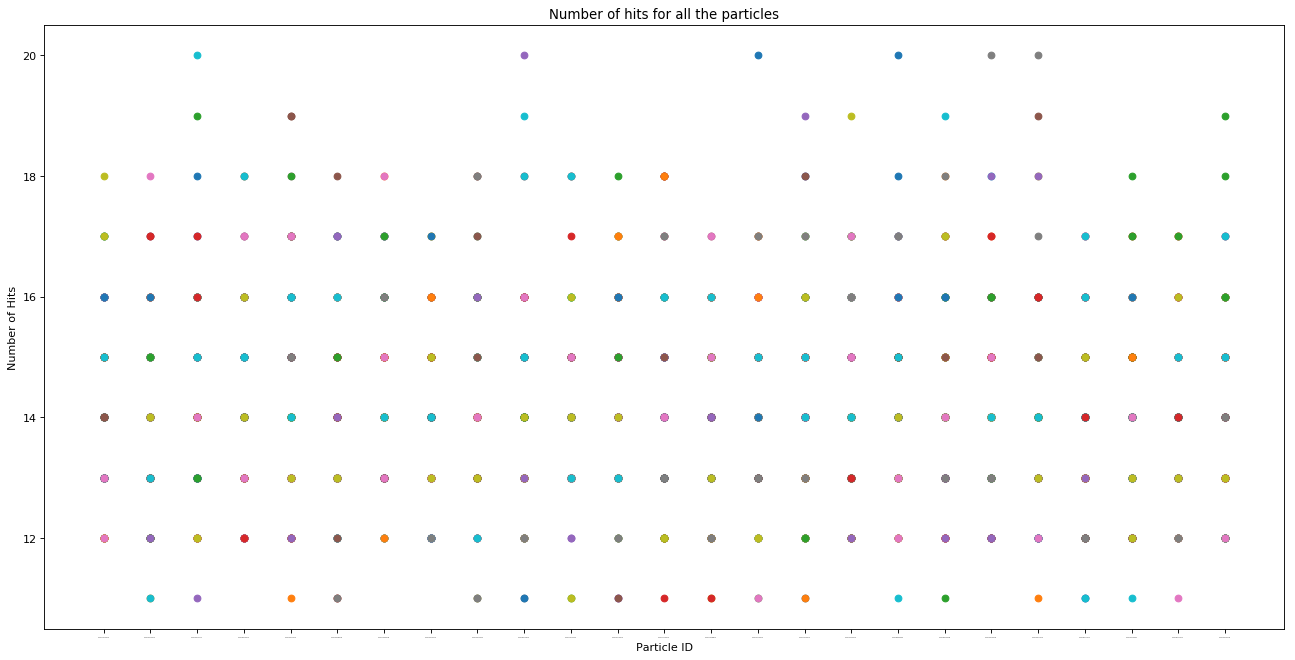

In [4]:
# keep track of statistics
hits = {}

# plot settings
plt.figure(figsize=(20, 10), dpi=80)
plt.xticks(fontsize=1)
plt.xlabel('Particle ID')
plt.ylabel('Number of Hits')
plt.title('Number of hits for all the particles')

# get the dataframe of each file
for df in dfs:
    unique_particle_ids = list(set(df['particle_id']))
    number_of_hits = [df[df['particle_id'] == pid].shape[0] for pid in unique_particle_ids]
    plt.scatter(list(map(lambda pid: str(pid), unique_particle_ids)), number_of_hits)
    
    # update statistics: increment counters
    for i in range(len(unique_particle_ids)):
        num_hits = number_of_hits[i]
        hits[num_hits] = hits.get(num_hits, 0) + 1

Looks messy and doesn't give much insight. Maybe better in a Histogram:

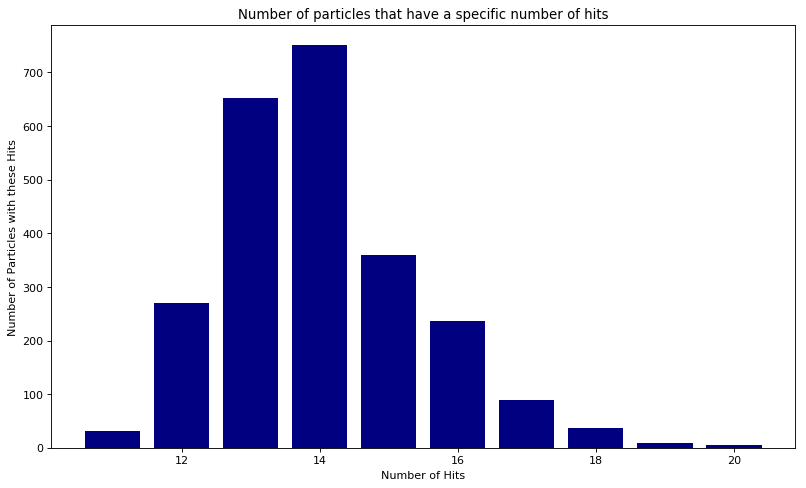

In [5]:
plt.figure(figsize=(12, 7), dpi=80)
plt.xlabel('Number of Hits')
plt.ylabel('Number of Particles with these Hits')
plt.bar(hits.keys(), hits.values(), color='navy')
plt.title('Number of particles that have a specific number of hits')
plt.show()

### Let's take a look now at the number of hits per pseudorapidity value.

In [6]:
# how many hits a specific eta value produced
eta_to_nhits = {}
# how many particled had a specific pseudorapidity value
eta_to_nparticles = {}


# get the dataframe of each file
for df, final_df in zip(dfs, final_dfs):
    
    # compute pseudorapidity
    final_df['pt'] = np.sqrt(final_df['px'] ** 2 + final_df['py'] ** 2)
    final_df['|p|'] = np.sqrt(final_df['px'] ** 2 + final_df['py'] ** 2 + final_df['pz'] ** 2)
    final_df['theta'] = np.arccos(final_df['pz'] / final_df['|p|'])
    final_df['eta'] = -np.log(np.tan(final_df['theta'] / 2))

    unique_particle_ids = list(set(df['particle_id']))
    number_of_hits = {pid: df[df['particle_id'] == pid].shape[0] for pid in unique_particle_ids}
    
    # update statistics
    for pid in unique_particle_ids:
        eta = final_df[final_df['particle_id'] == pid]['eta'].iloc[0]
        num_hits = number_of_hits[pid]
        eta_to_nhits[eta] = eta_to_nhits.get(eta, 0) + num_hits
        eta_to_nparticles[eta] = eta_to_nparticles.get(eta, 0) + 1

Let's plot the total hits first.

In [7]:
min_eta = min(eta_to_nhits.keys())
max_eta = max(eta_to_nhits.keys())

number_of_bins = 10
bin_length = (max_eta - min_eta) / number_of_bins
sum_of_hits = np.zeros(number_of_bins)

for eta, hits in eta_to_nhits.items():
    _bin = int((eta - min_eta - 1e-12) / bin_length)
    sum_of_hits[_bin] += hits

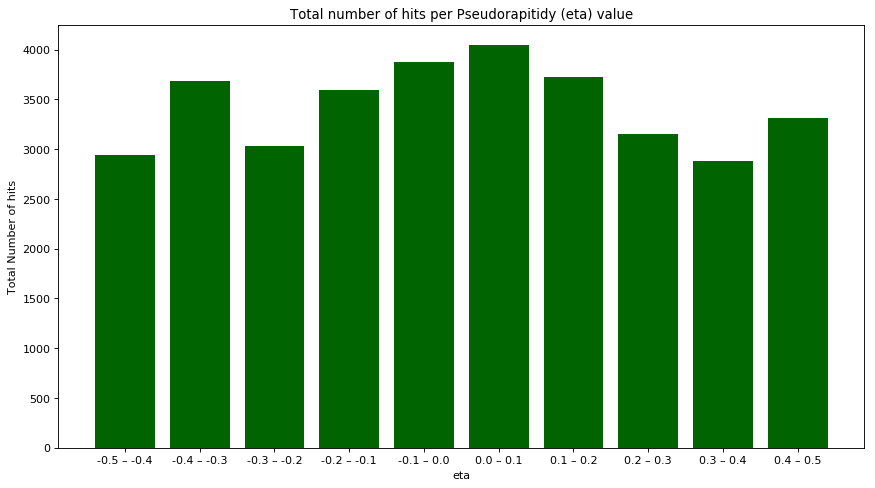

In [8]:
plt.figure(figsize=(13, 7), dpi=80)

plt.xlabel('eta')
plt.ylabel('Total Number of hits')
xticks_range = np.arange(0, 10, 1)
xticks = np.arange(min_eta, max_eta, bin_length)
xtick_labels = [f'{round(n, 3) or 0.0} – {round(n+bin_length, 3) or 0.0}' for n in xticks]
plt.xticks(xticks_range, labels=xtick_labels)
plt.bar(xticks_range, sum_of_hits, color='darkgreen')
plt.title('Total number of hits per Pseudorapitidy (eta) value')

plt.show()

Of course, the dataset might be imbalanced. Let's now plot the average hits.

In [9]:
average_hits_per_eta = {}
for eta, nhits in eta_to_nhits.items():
    average_hits_per_eta[eta] = nhits / eta_to_nparticles[eta]

Compute the average number of hits per pseudorapidity for ranges of length 0.1

In [10]:
number_of_bins = 10
bin_length = (max_eta - min_eta) / number_of_bins
sum_of_average_hits = np.zeros(number_of_bins)
count_bin_has_been_selected = np.zeros(number_of_bins)


for eta, average_hits in average_hits_per_eta.items():
    _bin = int((eta - min_eta - 1e-12) / bin_length)
    sum_of_average_hits[_bin] += average_hits
    count_bin_has_been_selected[_bin] += 1
    
average_hits = sum_of_average_hits / (count_bin_has_been_selected + 1e-8)

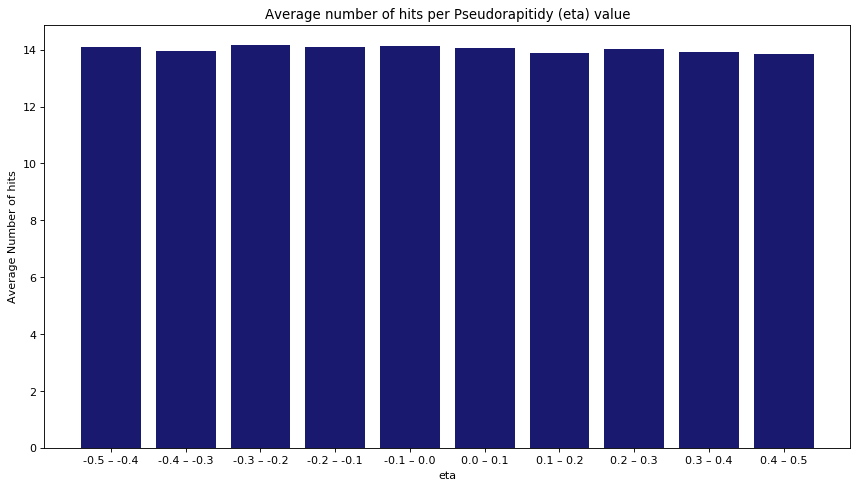

In [11]:
plt.figure(figsize=(13, 7), dpi=80)

plt.xlabel('eta')
plt.ylabel('Average Number of hits')
xticksxticks_range= np.arange(0, 10, 1)
xtick_labels = [f'{round(n, 3) or 0.0} – {round(n+bin_length, 3) or 0.0}' for n in xticks]
plt.xticks(xticks_range, labels=xtick_labels)
plt.bar(xticks_range, average_hits, color='midnightblue')
plt.title('Average number of hits per Pseudorapitidy (eta) value')

plt.show()